In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [8]:
data                    =   pd.read_csv('./ProcessedDataSet/resutT.csv')
questions               =   data['Title'].values

In [9]:
questions

array(['How do I improve LMS / NLMS filter performance?',
       'How to decide what platform is best to implement real-time audio processing on?',
       'What does a "vector" in a hidden Markov model mean?', ...,
       'FFT: do I need to include gaps in data in my FFT domain?',
       'Protect an IIR filter from being reverse-engineered',
       'Using Spreading spectral with Maximal likelihood'], dtype=object)

In [10]:
vectorizer              =  TfidfVectorizer(stop_words="english")
X                       =  vectorizer.fit_transform(questions)
words                   =  vectorizer.get_feature_names()

In [27]:
n_clusters              =  1250
number_of_seeds_to_try  =  10
max_iter                =  300
number_of_process       =  2 
model                   =  KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=number_of_seeds_to_try, n_jobs=number_of_process).fit(X)

In [28]:
from sklearn.externals import joblib
joblib.dump(model, './TrainedModels/ClusterModel.pkl', protocol=2) 

['./TrainedModels/ClusterModel.pkl']

In [13]:
ClusterDF = pd.DataFrame(columns=['Id', 'Cluster'])

for index, row in data.iterrows():
    question  = row.Title
    Y         =  vectorizer.transform([question])
    Pcluster  =  model.predict(Y)[0]
    ClusterDF = ClusterDF.append({'Id':row['Id'], 'Cluster':Pcluster}, ignore_index=True)

In [29]:
WordVec  =  X.toarray()
Preds    =  ClusterDF['Cluster']
silhouette_score (WordVec, Preds, metric='euclidean')

0.04065099969858449

In [15]:
result = pd.merge(data, ClusterDF, on='Id')

In [16]:
result.to_csv('./ProcessedDataSet/ClusterdResult.csv', index=False)

In [17]:
LiveQuestion = 'What is Laplace Transform?'
Y            =  vectorizer.transform([LiveQuestion])
Pcluster     =  model.predict(Y)[0]

In [18]:
QAtimes      =  result[result['Cluster']==Pcluster].ATime.values
SimilarQs    =  result[result['Cluster']==Pcluster].Title.values

Text(0, 0.5, 'Count')

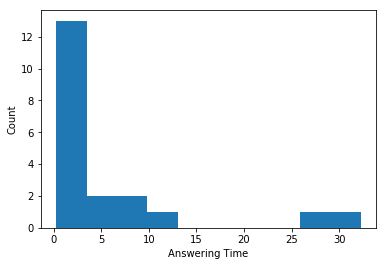

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  
fig, ax = plt.subplots()
im = ax.hist(QAtimes)
plt.xlabel('Answering Time')
plt.ylabel('Count')

In [20]:
print ('Estimated Answering Time :', np.around(np.median(QAtimes), decimals=1), 'Minutes')

Estimated Answering Time : 3.0 Minutes
